# ✅ 1. Import Required Libraries

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Models
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    auc
)

# Global Config
RANDOM_STATE = 42
TEST_SIZE = 0.2

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ✅2: Read Data

In [2]:
dataset = pd.read_csv(r'D:\Projects\projects_uncomplet\Waze User Churn Prediction\data\waze_dataset.csv')

## Cheak Data

#### Shape

In [3]:
print("Shape:", dataset.shape)

Shape: (14999, 13)


#### INFO

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### Head

In [5]:
display(dataset.head())

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


#### describe

In [6]:
display(dataset.describe())

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


#### Missing Values

In [7]:
display(dataset.isna().sum())


ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

#### remove null in target 

In [8]:
dataset.dropna(subset=['label'], inplace=True)

# ✅3:Defining the variables and processing the initial data

In [9]:
dataset.drop(columns=['ID'], inplace=True)

In [10]:
X = dataset.drop(columns=['label'])
y = dataset['label']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)
print("Train distribution:\n", y_train.value_counts(normalize=True))

Train distribution:
 label
retained    0.822624
churned     0.177376
Name: proportion, dtype: float64


# ✅4: Preprocessing

#### defining num_features , cat_features

In [12]:
num_features = X.select_dtypes(include='number').columns
cat_features = X.select_dtypes(include='object').columns

In [13]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

#### smote

In [14]:
pipeline = ImbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        class_weight="balanced",
        random_state=RANDOM_STATE
    ))
])

#### param_grid

In [15]:
param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [8, 12, None]
}

#### GridSearch

In [16]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [17]:
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best ROC-AUC:", grid.best_score_)
print("Best Params:", grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC-AUC: 0.7321297984736244
Best Params: {'model__max_depth': 8, 'model__n_estimators': 400}


# ✅5: prediction

In [18]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

     churned       0.33      0.59      0.42       507
    retained       0.89      0.73      0.81      2353

    accuracy                           0.71      2860
   macro avg       0.61      0.66      0.61      2860
weighted avg       0.79      0.71      0.74      2860

ROC-AUC: 0.7304159111998532


### Confusion Matrix

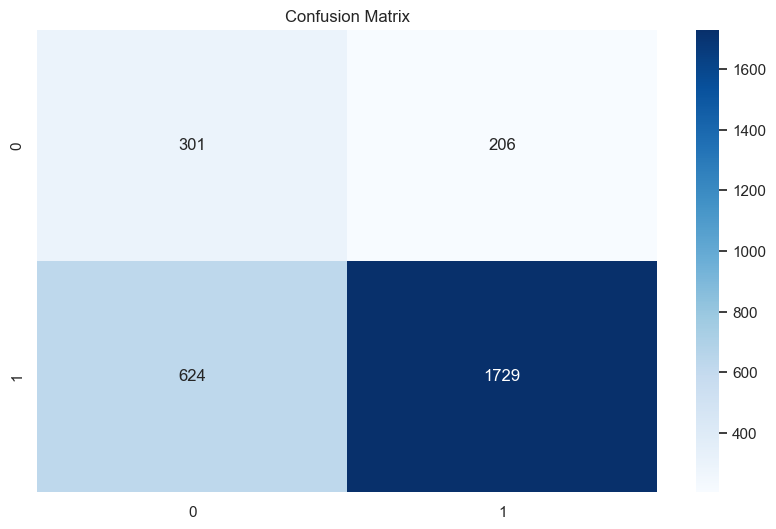

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

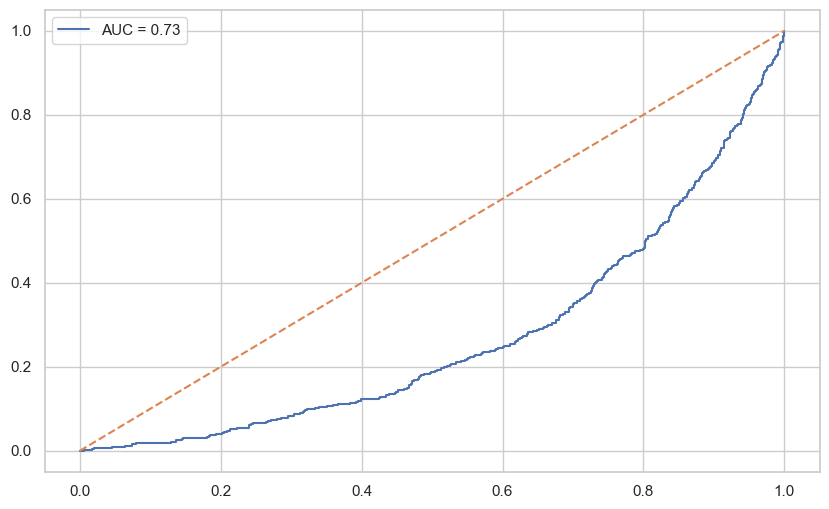

In [20]:
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="churned")
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], "--")
plt.legend()
plt.show()

# ✅6: Detecting and handling outlier values.

#### Boxplots

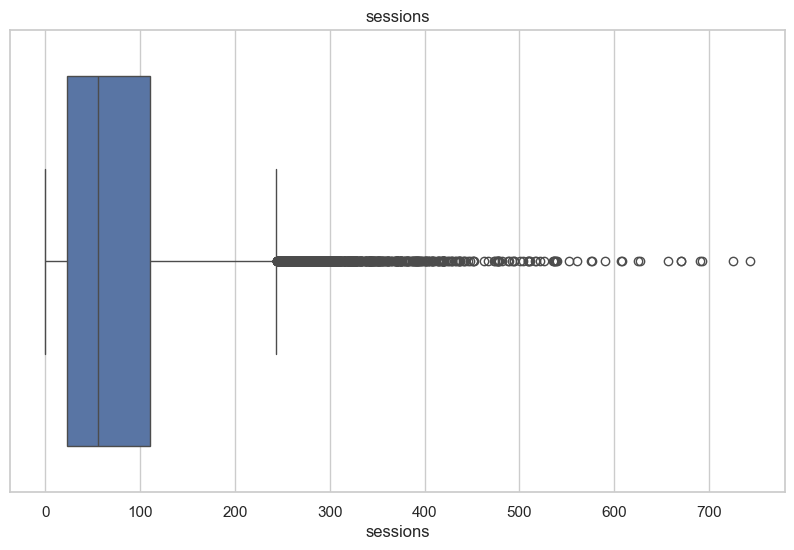

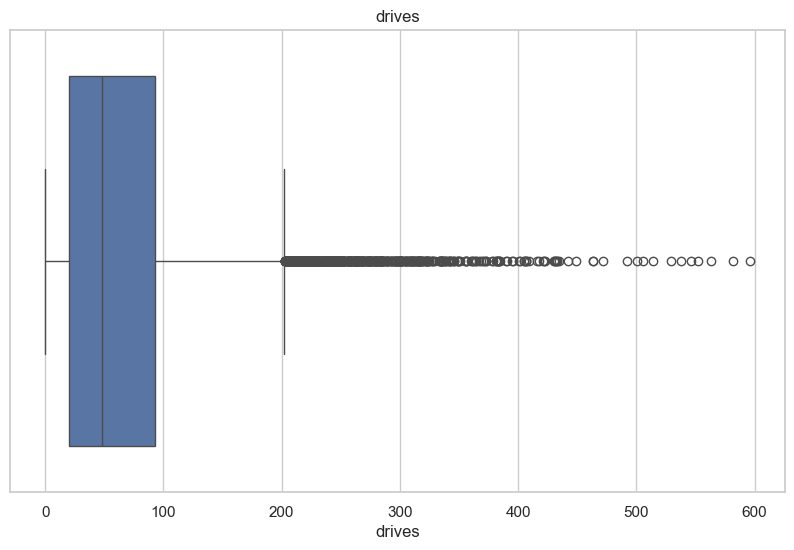

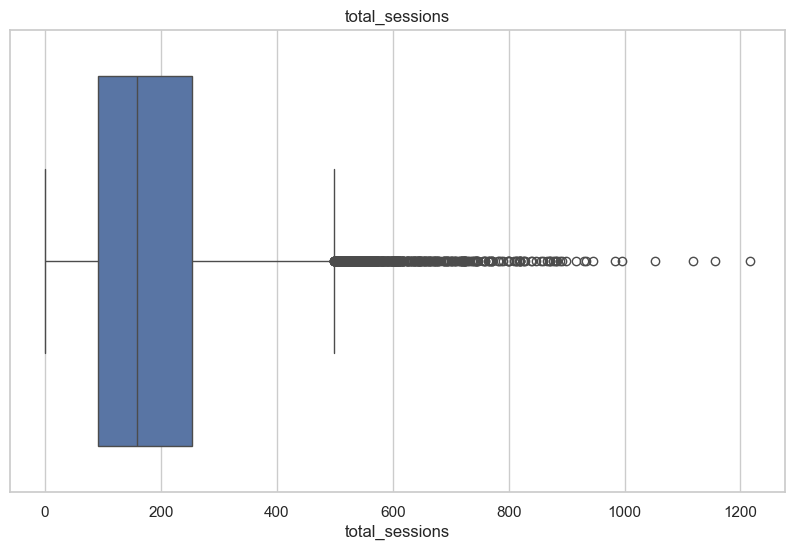

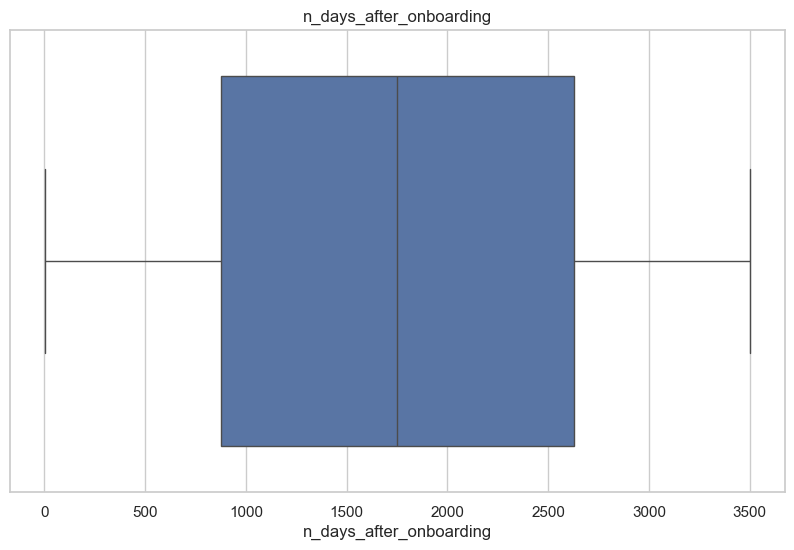

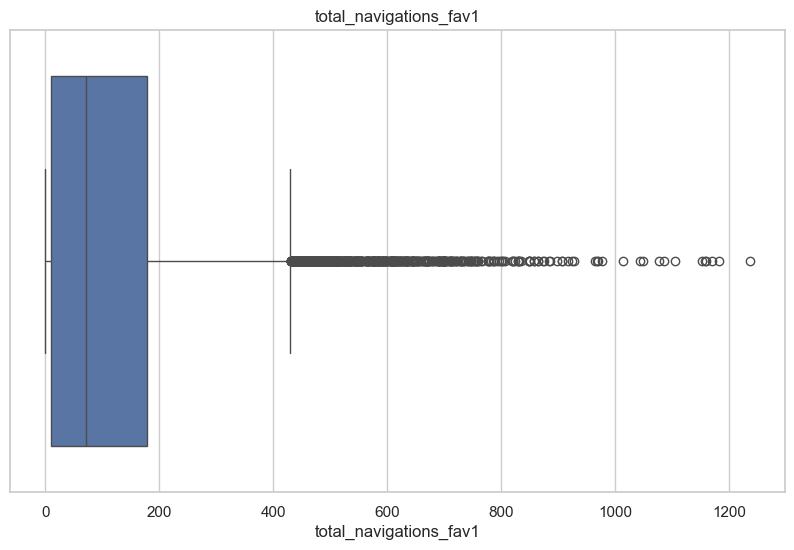

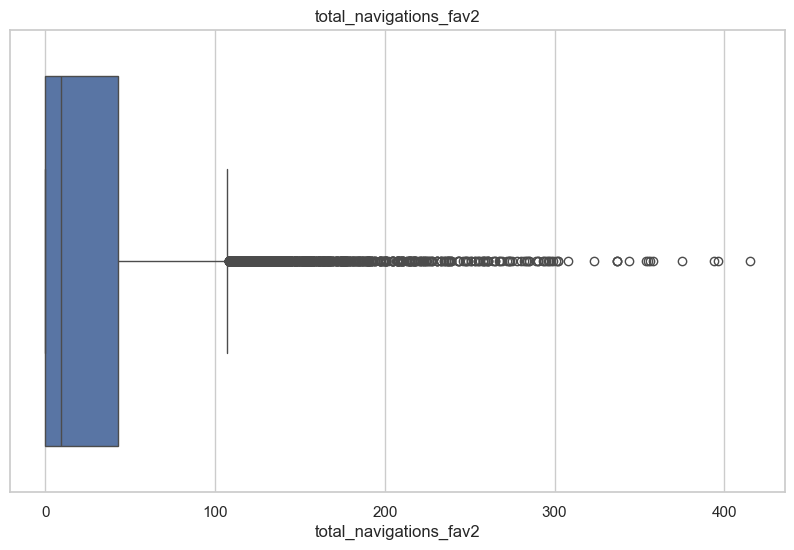

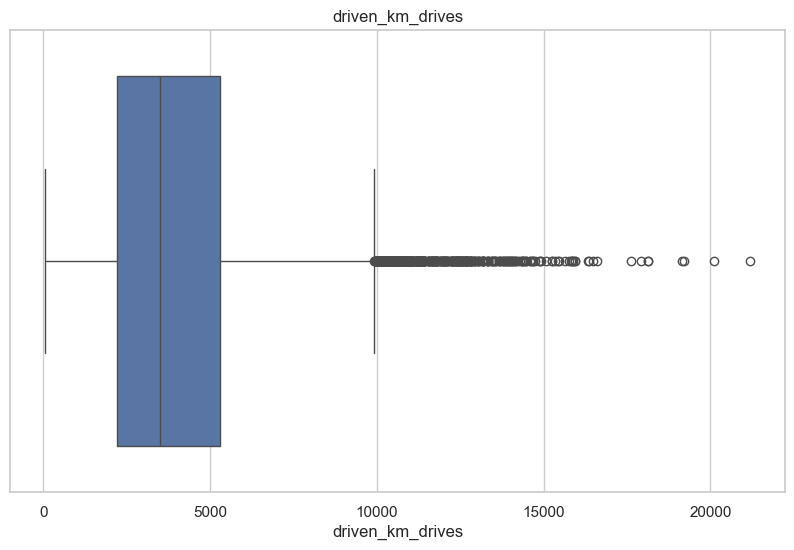

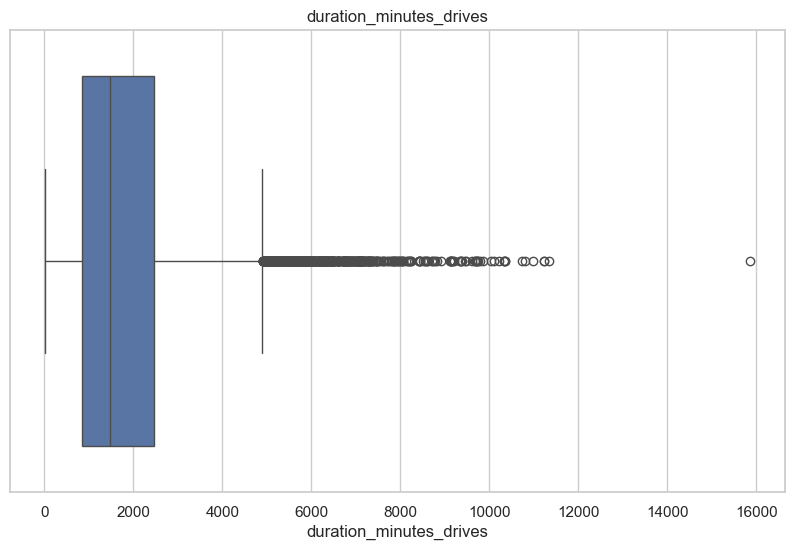

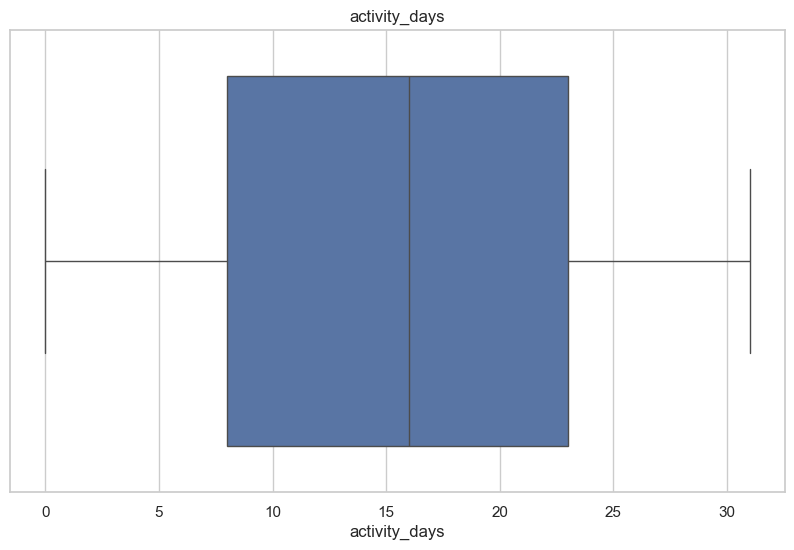

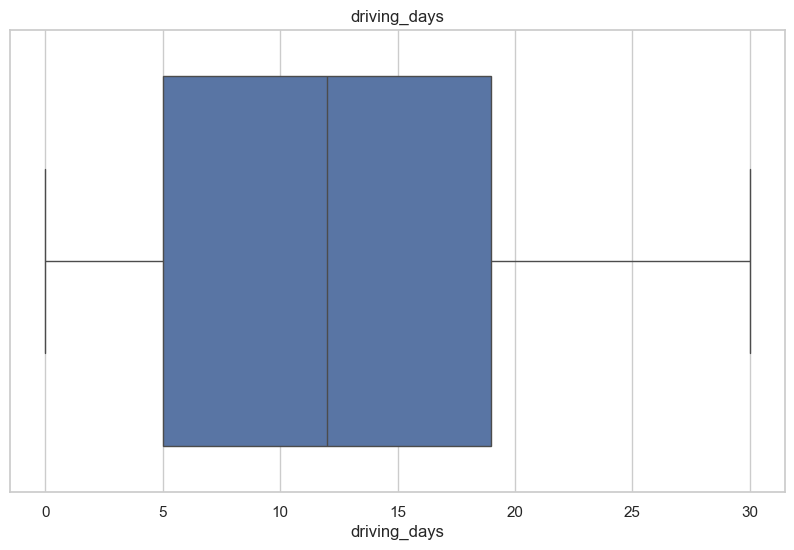

In [21]:
for col in dataset.select_dtypes(include='number'):
    sns.boxplot(x=dataset[col])
    plt.title(col)
    plt.show()

#### IQR Clipping

In [22]:
for col in dataset.select_dtypes(include='number'):
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    dataset[col] = dataset[col].clip(lower, upper)

# ✅7: Encoding categorical variables

In [23]:
encoder = LabelEncoder()

for col in dataset.select_dtypes(include='object'):
    dataset[col] = encoder.fit_transform(dataset[col])

# ✅8: Analysis of the target variable (Visualization)

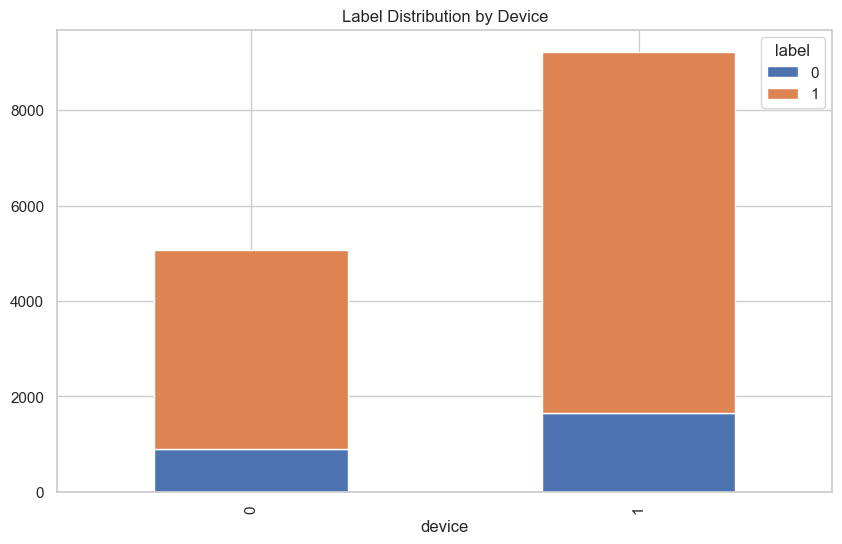

In [24]:
device_label = dataset.groupby(['device', 'label']).size().unstack(fill_value=0)

device_label.plot(kind='bar', stacked=True)
plt.title("Label Distribution by Device")
plt.show()

# ✅9: Data Partitioning + SMOTE

In [25]:
X = dataset.drop('label', axis=1)
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {1: 9410, 0: 2029}
After SMOTE: {0: 9410, 1: 9410}


# ✅10: Helper function for evaluating models

In [26]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.2f}")
    plt.plot([0,1],[0,1],'--')
    plt.legend()
    plt.show()

# ✅11: Training the models

#### Bagging

Accuracy: 0.5762237762237762
              precision    recall  f1-score   support

           0       0.18      0.40      0.25       507
           1       0.83      0.61      0.70      2353

    accuracy                           0.58      2860
   macro avg       0.51      0.51      0.48      2860
weighted avg       0.71      0.58      0.62      2860



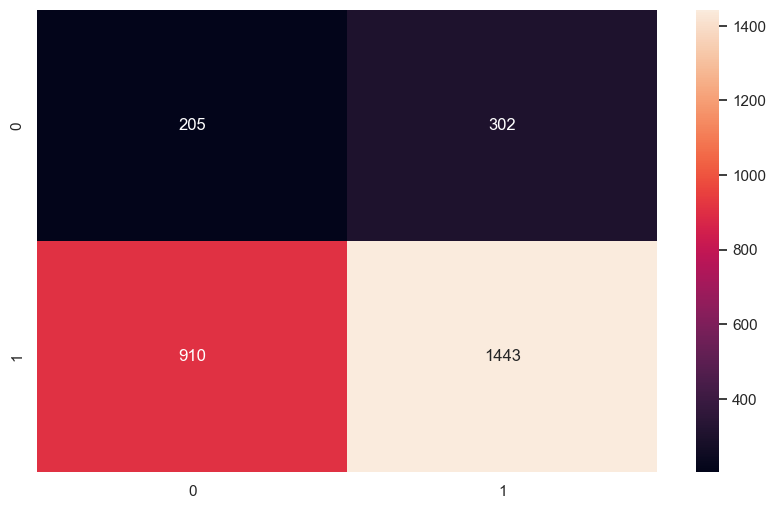

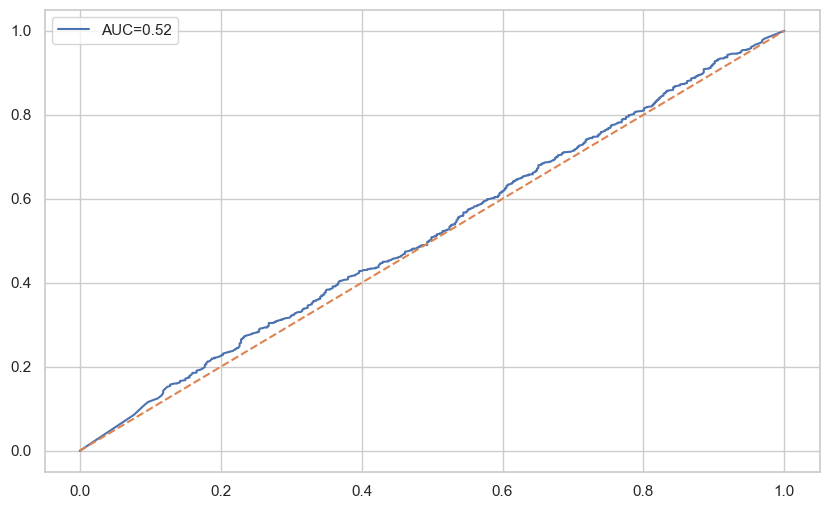

In [27]:
bagging = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train_res, y_train_res)
evaluate_model(bagging, X_test, y_test)

#### Random Forest

Accuracy: 0.6916083916083916
              precision    recall  f1-score   support

           0       0.29      0.53      0.38       507
           1       0.88      0.73      0.79      2353

    accuracy                           0.69      2860
   macro avg       0.59      0.63      0.59      2860
weighted avg       0.77      0.69      0.72      2860



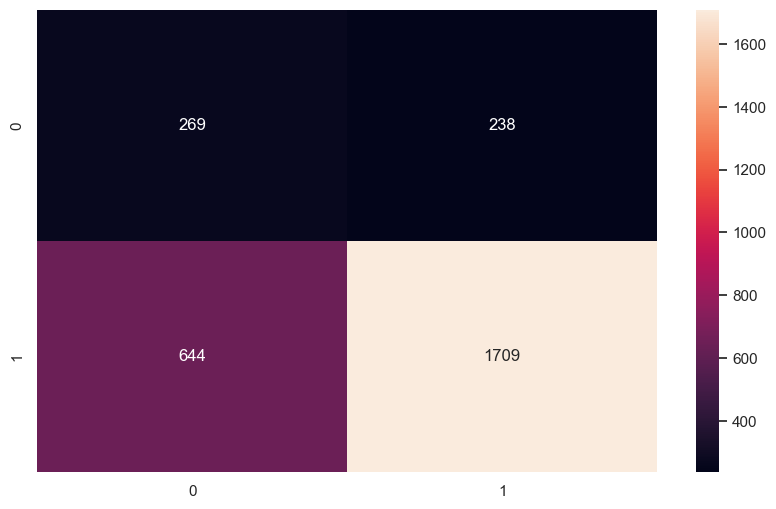

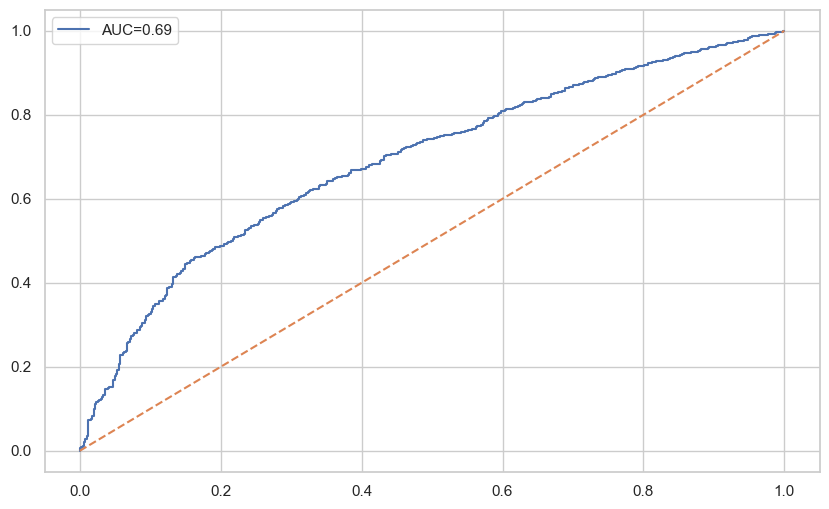

In [28]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train_res, y_train_res)
evaluate_model(rf, X_test, y_test)

#### AdaBoost

Accuracy: 0.6094405594405594
              precision    recall  f1-score   support

           0       0.28      0.78      0.41       507
           1       0.92      0.57      0.71      2353

    accuracy                           0.61      2860
   macro avg       0.60      0.68      0.56      2860
weighted avg       0.81      0.61      0.66      2860



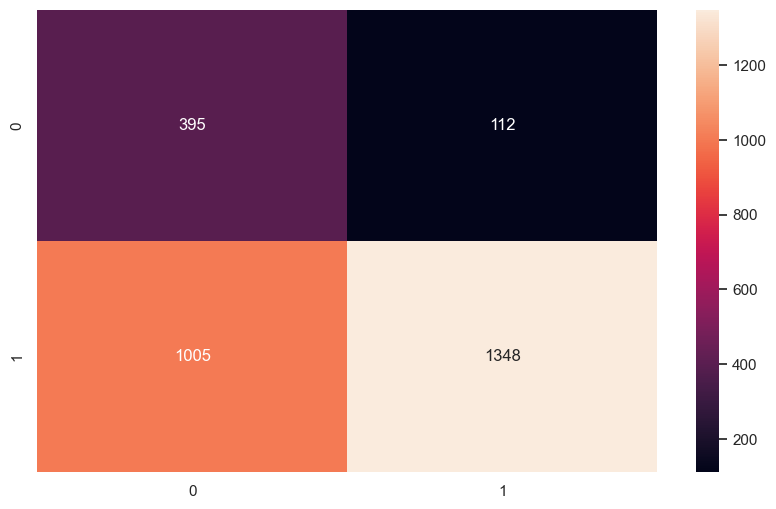

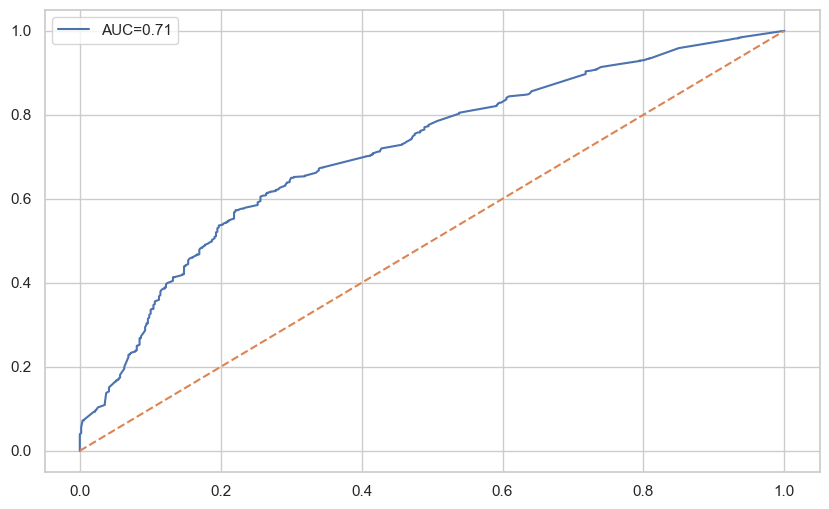

In [29]:
adaboost = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)
adaboost.fit(X_train_res, y_train_res)
evaluate_model(adaboost, X_test, y_test)

#### Gradient Boosting

Accuracy: 0.6839160839160839
              precision    recall  f1-score   support

           0       0.28      0.50      0.36       507
           1       0.87      0.72      0.79      2353

    accuracy                           0.68      2860
   macro avg       0.58      0.61      0.58      2860
weighted avg       0.77      0.68      0.71      2860



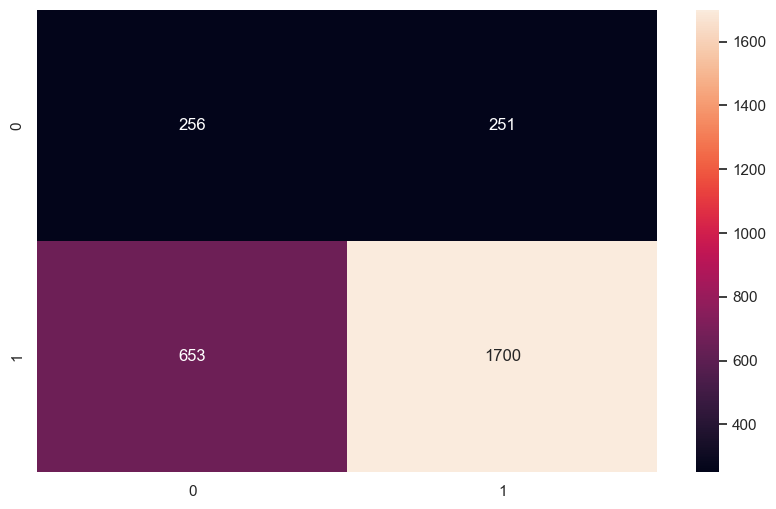

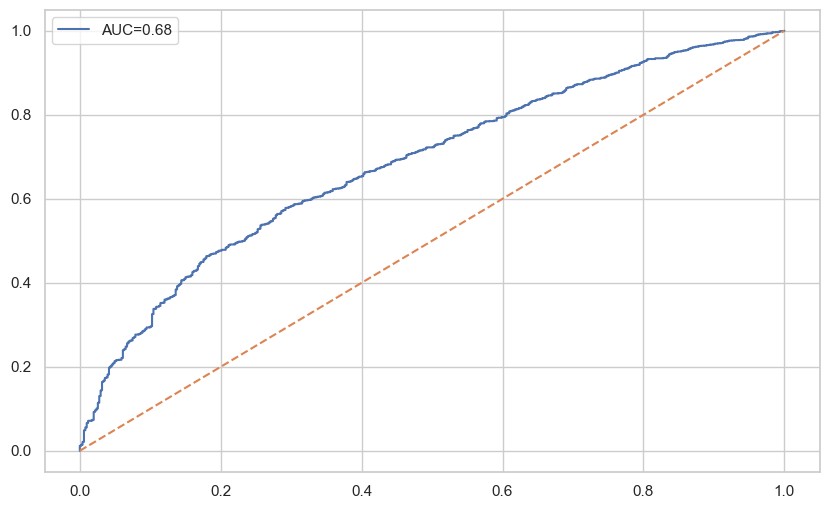

In [30]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)
gb.fit(X_train_res, y_train_res)
evaluate_model(gb, X_test, y_test)

# ✅12: Model Comparison

In [31]:
models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "AdaBoost": adaboost,
    "Gradient Boosting": gb
}

results = []

for name, model in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, model.predict(X_test))
    })

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy
1,Random Forest,0.691608
3,Gradient Boosting,0.683916
2,AdaBoost,0.609441
0,Bagging,0.576224
